In [3]:
import csv
import time
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
    
print(time.strftime('%Y.%m.%d %H:%M:%S', time.localtime(time.time())))
Bp_pred = list()
Bp_targ = list()

count = 0
with open("./3_infer_mp/3_infer_mp_20230906.csv", 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        count += 1
        Bp_pred.append(eval(row[1]))
        Bp_targ.append(eval(row[2]))
print(f"MAE: {'%.3f' % mean_absolute_error(Bp_pred, Bp_targ)}")
print(f"MSE: {'%.3f' % mean_squared_error(Bp_pred, Bp_targ)}")
print(f"RMSE: {'%.3f' % sqrt(mean_squared_error(Bp_pred, Bp_targ))}")
print(f"r2: {'%.3f' % r2_score(Bp_pred, Bp_targ)}")

2024.04.18 09:18:24
MAE: 10.447
MSE: 222.746
RMSE: 14.925
r2: 0.974


In [2]:
import csv
import time
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
    
print(time.strftime('%Y.%m.%d %H:%M:%S', time.localtime(time.time())))
Bp_pred_train = list()
Bp_targ_train = list()

count = 0
with open("./5_infer_mp/5_infer_mp_20230906.csv", 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        count += 1
        Bp_pred_train.append(eval(row[1]))
        Bp_targ_train.append(eval(row[2]))
print(f"MAE: {'%.3f' % mean_absolute_error(Bp_pred_train, Bp_targ_train)}")
print(f"MSE: {'%.3f' % mean_squared_error(Bp_pred_train, Bp_targ_train)}")
print(f"RMSE: {'%.3f' % sqrt(mean_squared_error(Bp_pred_train, Bp_targ_train))}")
print(f"r2: {'%.3f' % r2_score(Bp_pred_train, Bp_targ_train)}")

2024.04.18 09:18:20


FileNotFoundError: [Errno 2] No such file or directory: './5_infer_mp/5_infer_mp_20230906.csv'

In [7]:
def plot_predict_label_test(x_label, y_predict, x_label_total, y_predict_total, _label = 'property', 
    x_set_major = 0, y_set_major = 0, x_set_minor = 0, y_set_minor = 0,
    xlim_a = 0,  xlim_b = 0, ylim_a = 0, ylim_b = 0, x_y_range = 1):
    import numpy as np 
    import matplotlib.mlab as mlab 
    import matplotlib.pyplot as plt
    from sklearn.metrics import r2_score
    from math import sqrt
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error

    front1={'family':'arial','weight': 'normal','size':12}
    front2={'family':'arial','weight': 'normal','size':14}
    plt.xlabel(f'Exp. {_label}', front1) #绘制x轴 
    plt.ylabel(f'Pred. {_label}', front1) #绘制y轴 
    plt.tick_params(axis='both',which='major',length=6,width=2,direction='in',labelsize=14)#设置主坐标轴刻度大小
    plt.tick_params(axis='both',which='minor',length=3,width=1,direction='in',labelsize=14)#设置次坐标轴刻度大小

    # plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$')#中文标题 u'xxx' 

    ax=plt.gca()
    plt.scatter(x_label_total, y_predict_total, c='#5E9AEC', s=3)
    plt.scatter(x_label, y_predict, c='#F47575', s=3)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # from pylab import *
    # minorticks_on()
    # from matplotlib.pyplot import MultipleLocator
    # x_major_locator=MultipleLocator(2)
    # y_major_locator=MultipleLocator(0.2)
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    if x_set_major != 0:
        ax.xaxis.set_major_locator(plt.MultipleLocator(x_set_major))
    if y_set_major != 0:
        ax.yaxis.set_major_locator(plt.MultipleLocator(y_set_major))
    if x_set_minor != 0:
        ax.xaxis.set_minor_locator(plt.MultipleLocator(x_set_minor))
    if y_set_minor != 0:
        ax.yaxis.set_minor_locator(plt.MultipleLocator(y_set_minor))
   
    # labels = [tick.get_text() for tick in ax.get_yticklabels()]
    # ax.set_yticklabels(labels[:-1])
    if xlim_a !=0 and xlim_b !=0:
        plt.xlim(xlim_a, xlim_b)
    if ylim_a !=0 and ylim_b !=0:
        plt.ylim(ylim_a, ylim_b)
    plt.subplots_adjust(left=0.15)#左边距 

    x = [min(x_label) - x_y_range, max(x_label) + x_y_range]
    y = x
    plt.plot(x, y, ls='--', c='k', alpha=0.5)

    plt.show()

In [8]:
def plot_predict_label(x_label, y_predict, x_label_total, y_predict_total, hot_map = "total", label_s = 'property', 
    x_set_major = 0, y_set_major = 0, x_set_minor = 0, y_set_minor = 0,
    xlim_a = 0,  xlim_b = 0, ylim_a = 0, ylim_b = 0, x_y_range = 1):
    import numpy as np 
    import matplotlib.mlab as mlab 
    import matplotlib.pyplot as plt
    from sklearn.metrics import r2_score
    from scipy.stats import gaussian_kde
    from matplotlib.colors import LogNorm
    from math import sqrt
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error

    # plt.scatter(result_1, train_dataset.y, c='#5E9AEC', s=3)
    # # plt.scatter(valid_dataset, valid_dataset_hat, c='orange', s=20, label = "valid_dataset")
    # plt.scatter(result, test_dataset.y, c='#F47575', s=3)

    front1={'family':'arial','weight': 'normal','size':12}
    front2={'family':'arial','weight': 'normal','size':14}
    plt.xlabel(f'Label of {label_s}', front1) #绘制x轴 
    plt.ylabel(f'Prediction of {label_s}', front1) #绘制y轴 
    plt.tick_params(axis='both',which='major',length=6,width=2,direction='in',labelsize=14)#设置主坐标轴刻度大小
    plt.tick_params(axis='both',which='minor',length=3,width=1,direction='in',labelsize=14)#设置次坐标轴刻度大小

    # plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$')#中文标题 u'xxx'
    if hot_map == "total":
        x = x_label_total
        y = y_predict_total
    else:
        x = x_label
        y = y_predict
    x = np.array(x)
    y = np.array(y)
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    # plt.figure(dpi=300)
    ax=plt.gca()
    # fig, ax = plt.subplots()


    # ax=plt.gca(dpi=300)
    # plt.scatter(x_label_total, y_predict_total, c='#5E9AEC', s=3)
    # plt.scatter(x_label, y_predict, c='#F47575', s=3)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.scatter(x, y, c = z, s=1, cmap = 'Reds')
    x_ = [min(x_label) - x_y_range, max(x_label) + x_y_range]
    y_ = x_
    plt.plot(x_, y_, ls='--', c='k', alpha=0.5)
    
    cb1 = plt.colorbar()

    font = {'family' : 'Arial',
            'color'  : 'black',
            'weight' : 'normal',
            'size'   : 10,
            }
    cb1.set_label('Density',fontdict=font)

    # from pylab import *
    # minorticks_on()
    # from matplotlib.pyplot import MultipleLocator
    # x_major_locator=MultipleLocator(2)
    # y_major_locator=MultipleLocator(0.2)
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    if x_set_major != 0:
        ax.xaxis.set_major_locator(plt.MultipleLocator(x_set_major))
    if y_set_major != 0:
        ax.yaxis.set_major_locator(plt.MultipleLocator(y_set_major))
    if x_set_minor != 0:
        ax.xaxis.set_minor_locator(plt.MultipleLocator(x_set_minor))
    if y_set_minor != 0:
        ax.yaxis.set_minor_locator(plt.MultipleLocator(y_set_minor))
   
    # labels = [tick.get_text() for tick in ax.get_yticklabels()]
    # ax.set_yticklabels(labels[:-1])
    if xlim_a !=0 and xlim_b !=0:
        plt.xlim(xlim_a, xlim_b)
    if ylim_a !=0 and ylim_b !=0:
        plt.ylim(ylim_a, ylim_b)
    plt.subplots_adjust(left=0.15)#左边距 

    plt.show()

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


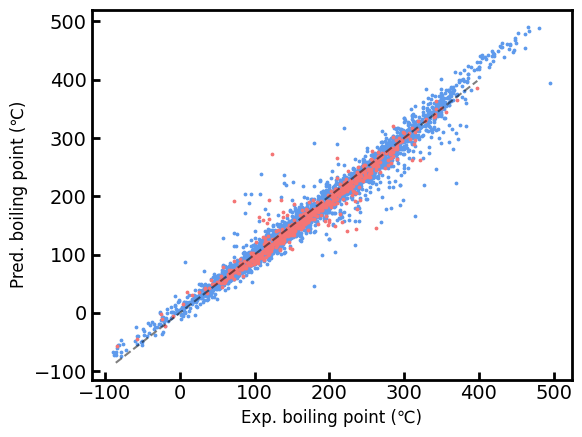

In [9]:
x_label = Bp_targ
y_predict = Bp_pred
x_label_total = Bp_targ_train
y_predict_total = Bp_pred_train
_label = 'boiling point (℃)'

plot_predict_label_test(x_label, y_predict, x_label_total, y_predict_total, _label = _label, 
    x_set_major = 0, y_set_major = 0, x_set_minor = 0, y_set_minor = 0,
    xlim_a = 0,  xlim_b = 0, ylim_a = 0, ylim_b = 0, x_y_range = 1)

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


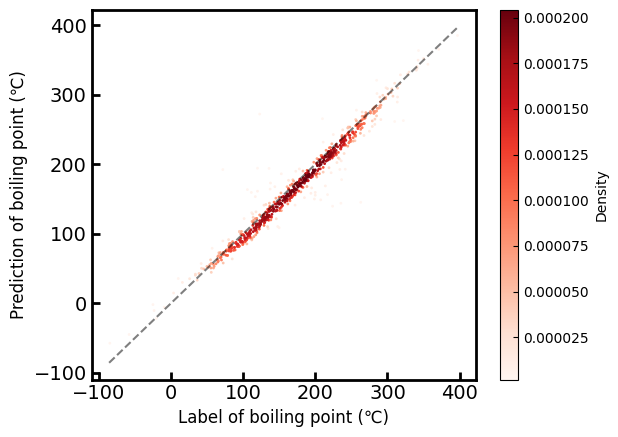

In [10]:
# 2 Formation_energy_solvent
x_label = Bp_targ
y_predict = Bp_pred
x_label_total = Bp_targ_train
y_predict_total = Bp_pred_train
_label = 'boiling point (℃)'

plot_predict_label(x_label, y_predict, x_label_total, y_predict_total, hot_map = "test", label_s = _label,
    x_set_major = 0, y_set_major = 0, x_set_minor = 0, y_set_minor = 0,\
    xlim_a = 0,  xlim_b = 0, ylim_a = 0, ylim_b = 0, x_y_range = 1)

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


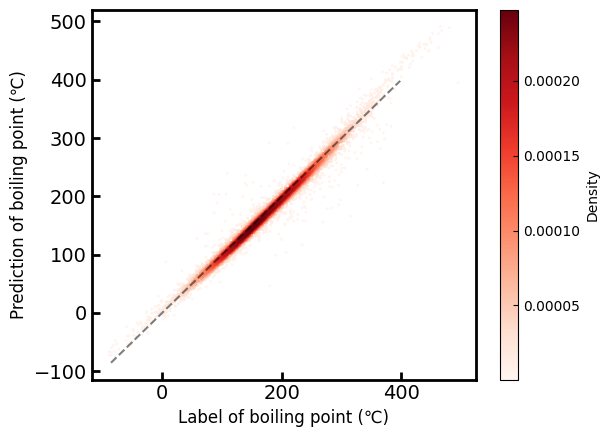

In [11]:
# 2 Formation_energy_solvent
x_label = Bp_targ
y_predict = Bp_pred
x_label_total = Bp_targ_train
y_predict_total = Bp_pred_train
_label = 'boiling point (℃)'

plot_predict_label(x_label, y_predict, x_label_total, y_predict_total, hot_map = "total", label_s = _label,
    x_set_major = 0, y_set_major = 0, x_set_minor = 0, y_set_minor = 0,\
    xlim_a = 0,  xlim_b = 0, ylim_a = 0, ylim_b = 0, x_y_range = 1)